# Objective of US-Housing-Assignment 

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia

To build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

### To find

-Which variables are significant in predicting the price of a house, and

-How well those variables describe the price of a house.

 

### To determine 

-The optimal value of lambda for ridge and lasso regression.

### Business Goal

To model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

In [1]:
# Importing Numpy and Pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

### Reading the Dataset

In [2]:
#Importing the Dataset
US_Hous=pd.read_csv("train.csv")
US_Hous.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Inspecting the dataset
print(US_Hous.shape)
print(US_Hous.columns)
print(US_Hous.info())
print(US_Hous.describe())

(1460, 81)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 

## Step 1 - Data Cleaning

In [4]:
print(US_Hous.isnull().values.any())
print(US_Hous.isnull().values.sum())
print(US_Hous.isnull().sum()*100/US_Hous.shape[0])

True
6965
Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
                   ...    
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
KitchenQual       0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
Fireplaces        

In [5]:
#printing unique values in columns
print(US_Hous["Id"].nunique())
print(US_Hous["MSSubClass"].nunique())
print(US_Hous["MSZoning"].nunique())
print(US_Hous["LotFrontage"].nunique())
print(US_Hous["LotArea"].nunique())
print(US_Hous["Street"].nunique())
print(US_Hous["LotShape"].nunique())
print(US_Hous["LandContour"].nunique())
print(US_Hous["Alley"].nunique())
#OR
print(US_Hous["Alley"].value_counts())

1460
15
5
110
1073
2
4
4
2
Grvl    50
Pave    41
Name: Alley, dtype: int64


In [6]:
#printing unique values in columns
print(US_Hous["Utilities"].nunique())
print(US_Hous["LotConfig"].nunique())
print(US_Hous["LandSlope"].nunique())
print(US_Hous["Neighborhood"].nunique())
print(US_Hous["Condition1"].nunique())
print(US_Hous["Condition2"].nunique())
print(US_Hous["BldgType"].nunique())
print(US_Hous["HouseStyle"].nunique())
print(US_Hous["OverallQual"].nunique())

2
5
3
25
9
8
5
8
10


In [7]:
#printing unique values in columns
print(US_Hous["OverallCond"].nunique())
print(US_Hous["YearBuilt"].nunique())
print(US_Hous["YearRemodAdd"].nunique())
print(US_Hous["RoofStyle"].nunique())
print(US_Hous["RoofMatl"].nunique())
print(US_Hous["Exterior1st"].nunique())
print(US_Hous["Exterior2nd"].nunique())
print(US_Hous["MasVnrType"].nunique())
print(US_Hous["MasVnrArea"].nunique())

9
112
61
6
8
15
16
4
327


In [8]:
#printing unique values in columns
print(US_Hous["ExterQual"].nunique())
print(US_Hous["ExterCond"].nunique())
print(US_Hous["Foundation"].nunique())
print(US_Hous["BsmtQual"].nunique())
print(US_Hous["BsmtCond"].nunique())
print(US_Hous["BsmtExposure"].nunique())
print(US_Hous["BsmtFinType1"].nunique())
print(US_Hous["BsmtFinSF1"].nunique())
print(US_Hous["BsmtFinType2"].nunique())
print(US_Hous["BsmtFinSF2"].nunique())

4
5
6
4
4
4
6
637
6
144


In [9]:
#printing unique values in columns
print(US_Hous["BsmtUnfSF"].nunique())
print(US_Hous["TotalBsmtSF"].nunique())
print(US_Hous["Heating"].nunique())
print(US_Hous["HeatingQC"].nunique())
print(US_Hous["CentralAir"].nunique())
print(US_Hous["Electrical"].nunique())
print(US_Hous["1stFlrSF"].nunique())
print(US_Hous["2ndFlrSF"].nunique())
print(US_Hous["LowQualFinSF"].nunique())
print(US_Hous["GrLivArea"].nunique())

780
721
6
5
2
5
753
417
24
861


In [10]:
#printing unique values in columns
print(US_Hous["BsmtFullBath"].nunique())
print(US_Hous["BsmtHalfBath"].nunique())
print(US_Hous["FullBath"].nunique())
print(US_Hous["HalfBath"].nunique())
print(US_Hous["BedroomAbvGr"].nunique())
print(US_Hous["KitchenAbvGr"].nunique())
print(US_Hous["KitchenQual"].nunique())
print(US_Hous["TotRmsAbvGrd"].nunique())
print(US_Hous["Functional"].nunique())
print(US_Hous["Fireplaces"].nunique())

4
3
4
3
8
4
4
12
7
4


In [11]:
#printing unique values in columns
print(US_Hous["FireplaceQu"].nunique())
print(US_Hous["GarageType"].nunique())
print(US_Hous["GarageYrBlt"].nunique())
print(US_Hous["GarageFinish"].nunique())
print(US_Hous["GarageCars"].nunique())
print(US_Hous["GarageArea"].nunique())
print(US_Hous["GarageQual"].nunique())
print(US_Hous["GarageCond"].nunique())
print(US_Hous["PavedDrive"].nunique())
print(US_Hous["WoodDeckSF"].nunique())

5
6
97
3
5
441
5
5
3
274


In [12]:
#printing unique values in columns
print(US_Hous["OpenPorchSF"].nunique())
print(US_Hous["EnclosedPorch"].nunique())
print(US_Hous["3SsnPorch"].nunique())
print(US_Hous["ScreenPorch"].nunique())
print(US_Hous["PoolArea"].nunique())
print(US_Hous["PoolQC"].nunique())
print(US_Hous["Fence"].nunique())
print(US_Hous["MiscFeature"].nunique())
print(US_Hous["MiscVal"].nunique())
print(US_Hous["MoSold"].nunique())


print(US_Hous["YrSold"].nunique())
print(US_Hous["SaleType"].nunique())
print(US_Hous["SaleCondition"].nunique())
print(US_Hous["SalePrice"].nunique())

202
120
20
76
8
3
4
4
21
12
5
9
6
663


In [13]:
#drop column which has unique value: only 1 such column was found
US_Hous=US_Hous.drop(['Id'],1)

In [14]:
#drop any column above 30%null
US_Hous=US_Hous.drop(['Alley', 'FireplaceQu','PoolQC','Fence','MiscFeature'],1)
US_Hous.shape

(1460, 75)

### NA Handeling

In [15]:
print(US_Hous.isnull().values.any())
print(US_Hous.isnull().values.sum())
print(US_Hous.isnull().sum()*100/US_Hous.shape[0])

True
868
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
                   ...    
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0

In [16]:
# Checking the datatype of all columns 
print(US_Hous.dtypes)

# Checking the datatype of the various year columns
print(US_Hous.YearBuilt.dtype)
print(US_Hous.YearRemodAdd.dtype)
print(US_Hous.GarageYrBlt.dtype)
print(US_Hous.YrSold.dtype)

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
                  ...   
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object


In [17]:
# filling any random value where there is null in GarageYrBlt
#US_Hous=US_Hous['GarageYrBlt'].fillna(999)
US_Hous.loc[US_Hous.GarageYrBlt.isnull(),['GarageYrBlt']] = 999

In [18]:
# We found that the datatype of GarageYrBlt is of float type and we must change it to int64
US_Hous['GarageYrBlt']= US_Hous['GarageYrBlt'].astype(int)
print(US_Hous.GarageYrBlt.dtype)

int32


In [19]:
US_Hous['GarageYrBlt'].unique()

array([2003, 1976, 2001, 1998, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1991, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 2008, 1957, 1920, 1966, 1959, 1995, 1954, 1953,  999, 1983,
       1977, 1997, 1985, 1963, 1981, 1964, 1999, 1935, 1990, 1945, 1987,
       1989, 1915, 1956, 1948, 1974, 2009, 1950, 1961, 1921, 1900, 1979,
       1951, 1969, 1936, 1975, 1971, 1923, 1984, 1926, 1955, 1986, 1988,
       1916, 1932, 1972, 1918, 1980, 1924, 1996, 1940, 1949, 1994, 1910,
       1978, 1982, 1992, 1925, 1941, 2010, 1927, 1947, 1937, 1942, 1938,
       1952, 1928, 1922, 1934, 1906, 1914, 1946, 1908, 1929, 1933],
      dtype=int64)

### NA Handelling

In [20]:
#cols = ["Weight","Height","BootSize","SuitSize","Type"]
#df2[cols] = df2[cols].replace({'0':np.nan, 0:np.nan})

# Lets Impute the nan value of catergorical with none
cols= ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
        'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
        'ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
        'HeatingQC','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond',
        'SaleType','SaleCondition']
US_Hous[cols]=US_Hous[cols].replace({np.nan:'none'})

In [21]:
# Lets impute the nan value in all numerical values to 0
num_vars = ['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
            'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath',
            'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea',
            'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
US_Hous[num_vars]=US_Hous[num_vars].replace({np.nan:'0'})

In [22]:
# For all the remaining attributes that have missing values, these are numeric variables or missing categorical,
# let's remove these rows
US_Hous.dropna(axis=0,inplace=True)

# Since there are a lot of rows with 0% and not all of the rows are properly visible
# Let's concentrate on the rows with greater than 0 % nulls

# Derive a list of all the raw attributes that contain atleast one missing values
attrib_with_null = [attrib  for attrib in US_Hous.columns if US_Hous[attrib].isnull().sum()>0]

# Total attributes with null values 
print ('Total attributes with null values:- ',len(attrib_with_null))

# Let's print the attribute name and percentage missing values
for attrib in attrib_with_null:
    print(attrib, 100 * np.round(US_Hous[attrib].isnull().mean(), 3),'%')

Total attributes with null values:-  0


In [23]:
print(US_Hous.isnull().values.any())
print(US_Hous.isnull().values.sum())
print(US_Hous.isnull().sum()*100/US_Hous.shape[0])

False
0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
                ... 
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional       0.0
Fireplaces       0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
Garag

In [24]:
US_Hous.shape

(1460, 75)

In [25]:
# Next step is to create three new  Variables . HouseAge, GarageAge, RemodAddAge

US_Hous['HouseAge'] = US_Hous['YrSold'] - US_Hous['YearBuilt']
US_Hous['RemodAddAge'] = US_Hous['YrSold'] - US_Hous['YearRemodAdd']
US_Hous['GarageAge'] = US_Hous['YrSold'] - US_Hous['GarageYrBlt']

In [26]:
# Drop the orginal columns 
US_Hous.drop(columns=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold'],inplace=True)

### Checking for Outliers

In [27]:
# Analysing Outliers
US_Hous.describe(percentiles=[0.05,0.1,0.2,0.25,0.35,0.5,0.6,0.75,0.9,0.99])
#US_Hous.describe(percentiles=[.25,.50,.75,.90,.95,.99])

,MSSubClass,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,HouseAge,RemodAddAge,GarageAge
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,36.547945,22.950000,83.652055
std,42.300571,9981.264932,1.382997,1.112799,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,30.250152,20.640653,225.597680
min,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
5%,20.000000,3311.700000,4.000000,4.000000,0.000000,0.000000,0.000000,519.300000,672.950000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,88000.000000,1.000000,0.000000,0.000000
10%,20.000000,5000.000000,5.000000,5.000000,0.000000,0.000000,74.900000,636.900000,756.900000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,106475.000000,1.000000,1.000000,1.000000
20%,20.000000,7078.400000,5.000000,5.000000,0.000000,0.000000,172.000000,755.800000,848.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,124000.000000,5.000000,3.000000,5.000000
25%,20.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,8.000000,4.000000,7.000000
35%,20.000000,8450.000000,5.000000,5.000000,56.650000,0.000000,320.650000,864.000000,959.650000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,141000.000000,15.000000,8.000000,13.000000
50%,50.000000,9478.500000,6.000000,5.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,35.000000,14.000000,30.000000


### Vizualizing the Outliers


#As we can see 99quantile and max value  for LotArea, OverallCond , BsmtFinSF1,TotalBsmtSF,1stFlrSF,GarageArea,
                                             GrLivArea,WoodDeckSF,OpenPorchSF, PoolArea,MiscVal   are far different . 
                                             
#So Vizualizing the boxplot of the same                                             

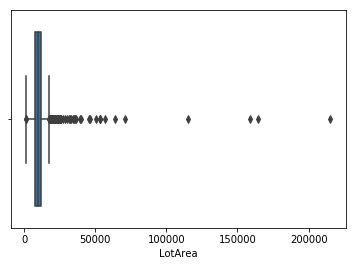

In [28]:
sns.boxplot(x=US_Hous['LotArea'])  

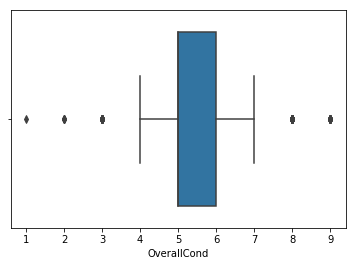

In [29]:
sns.boxplot(x=US_Hous['OverallCond'])

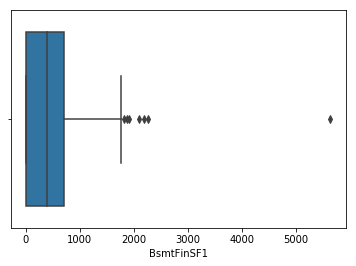

In [30]:
sns.boxplot(x=US_Hous['BsmtFinSF1'])

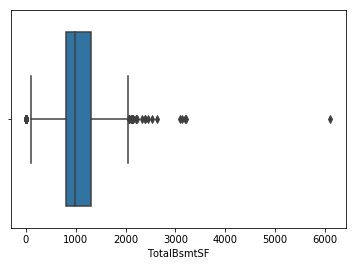

In [31]:
sns.boxplot(x=US_Hous['TotalBsmtSF'])

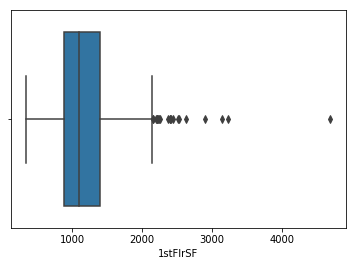

In [32]:
sns.boxplot(x=US_Hous['1stFlrSF'])  

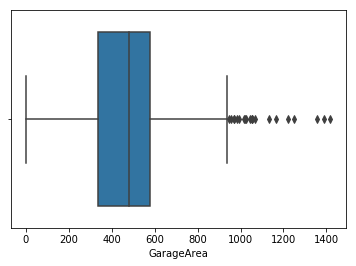

In [33]:
sns.boxplot(x=US_Hous['GarageArea'])  

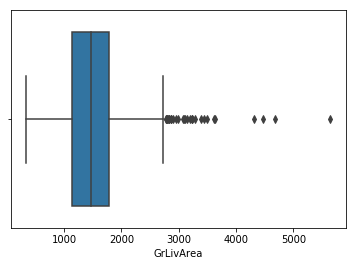

In [34]:
sns.boxplot(x=US_Hous['GrLivArea'])  

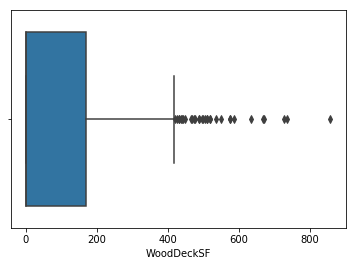

In [35]:
sns.boxplot(x=US_Hous['WoodDeckSF'])  

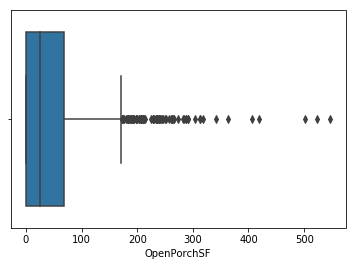

In [36]:
sns.boxplot(x=US_Hous['OpenPorchSF'])  

###  Outliers Treatment

#As we can see 99quantile and max value  for LotArea, OverallCond , BsmtFinSF1,TotalBsmtSF,1stFlrSF,GarageArea,
                                             GrLivArea,WoodDeckSF,OpenPorchSF   are far different . 
  
  
#As we can see the boxplot for Pool Area, MiscVal are very small and all the values lie outside the box, 
                                           it means that treating the outliers don't make any sense because it has only outliers
                                            and if we delete outliers then every other thing will also be deleted

In [37]:
#So we need to take care of the outliers for these all LotArea, OverallCond , BsmtFinSF1,TotalBsmtSF,1stFlrSF,GarageArea,
#                                                     GrLivArea,WoodDeckSF,OpenPorchSF 

#Outliers Treatment for LotArea
Q1=US_Hous.LotArea.quantile(0.25)
Q3=US_Hous.LotArea.quantile(0.75)
IQR=Q3-Q1
US_Hous=US_Hous[(US_Hous.LotArea > Q1-1.5*IQR) & (US_Hous.LotArea < Q3 + 1.5*IQR)]

In [38]:
#Outliers Treatment for OverallCond
Q1=US_Hous.OverallCond.quantile(0.25)
Q3=US_Hous.OverallCond.quantile(0.75)
IQR=Q3-Q1
US_Hous=US_Hous[(US_Hous.OverallCond > Q1-1.5*IQR) & (US_Hous.OverallCond < Q3 + 1.5*IQR)]

In [39]:
#Outliers Treatment for BsmtFinSF1
Q1=US_Hous.BsmtFinSF1.quantile(0.25)
Q3=US_Hous.BsmtFinSF1.quantile(0.75)
IQR=Q3-Q1
US_Hous=US_Hous[(US_Hous.BsmtFinSF1 > Q1-1.5*IQR) & (US_Hous.BsmtFinSF1 < Q3 + 1.5*IQR)]

In [40]:
#Outliers Treatment for TotalBsmtSF
Q1=US_Hous.TotalBsmtSF.quantile(0.25)
Q3=US_Hous.TotalBsmtSF.quantile(0.75)
IQR=Q3-Q1
US_Hous=US_Hous[(US_Hous.TotalBsmtSF > Q1-1.5*IQR) & (US_Hous.TotalBsmtSF < Q3 + 1.5*IQR)]

In [41]:
#Outliers Treatment for 1stFlrSF 
Q1=US_Hous['1stFlrSF'].quantile(0.25)
Q3=US_Hous['1stFlrSF'].quantile(0.75)
IQR=Q3-Q1
US_Hous=US_Hous[(US_Hous['1stFlrSF'] > Q1-1.5*IQR) & (US_Hous['1stFlrSF'] < Q3 + 1.5*IQR)]

In [42]:
#Outliers Treatment for GarageArea
Q1=US_Hous.GarageArea.quantile(0.25)
Q3=US_Hous.GarageArea.quantile(0.75)
IQR=Q3-Q1
US_Hous=US_Hous[(US_Hous.GarageArea > Q1-1.5*IQR) & (US_Hous.GarageArea < Q3 + 1.5*IQR)]

In [43]:
#Outliers Treatment for GrLivArea
Q1=US_Hous.GrLivArea.quantile(0.25)
Q3=US_Hous.GrLivArea.quantile(0.75)
IQR=Q3-Q1
US_Hous=US_Hous[(US_Hous.GrLivArea > Q1-1.5*IQR) & (US_Hous.GrLivArea < Q3 + 1.5*IQR)]

In [44]:
#Outliers Treatment for WoodDeckSF
Q1=US_Hous.WoodDeckSF.quantile(0.25)
Q3=US_Hous.WoodDeckSF.quantile(0.75)
IQR=Q3-Q1
US_Hous=US_Hous[(US_Hous.WoodDeckSF > Q1-1.5*IQR) & (US_Hous.WoodDeckSF < Q3 + 1.5*IQR)]

In [45]:
#Outliers Treatment for OpenPorchSF
Q1=US_Hous.OpenPorchSF.quantile(0.25)
Q3=US_Hous.OpenPorchSF.quantile(0.75)
IQR=Q3-Q1
US_Hous=US_Hous[(US_Hous.OpenPorchSF > Q1-1.5*IQR) & (US_Hous.OpenPorchSF < Q3 + 1.5*IQR)]

In [46]:
# Analysing Outliers
US_Hous.describe(percentiles=[0.05,0.1,0.2,0.25,0.35,0.5,0.6,0.75,0.9,0.99])
#US_Hous.describe(percentiles=[.25,.50,.75,.90,.95,.99])

,MSSubClass,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,HouseAge,RemodAddAge,GarageAge
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,...,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,56.802007,9131.104927,6.084854,5.471715,433.114051,43.167883,572.650547,1048.932482,1120.851277,311.235401,...,33.690693,21.089416,3.587591,14.571168,1.116788,21.189781,172689.683394,34.088504,23.343066,74.821168
std,42.644501,3138.375026,1.265311,0.793307,408.469155,151.313202,425.373069,334.152350,321.177097,403.309378,...,41.841953,58.908126,31.009228,53.630568,26.176658,147.064750,62196.383024,29.347492,20.701907,209.924829
min,20.000000,1491.000000,2.000000,4.000000,0.000000,0.000000,0.000000,105.000000,438.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37900.000000,0.000000,0.000000,0.000000
5%,20.000000,3182.000000,4.000000,5.000000,0.000000,0.000000,0.000000,587.250000,683.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91375.000000,1.000000,0.000000,0.000000
10%,20.000000,4639.500000,5.000000,5.000000,0.000000,0.000000,92.500000,672.000000,764.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,108979.500000,1.000000,1.000000,1.000000
20%,20.000000,7000.000000,5.000000,5.000000,0.000000,0.000000,189.000000,771.000000,847.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125000.000000,4.000000,3.000000,4.000000
25%,20.000000,7406.750000,5.000000,5.000000,0.000000,0.000000,246.750000,812.500000,866.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130000.000000,6.000000,4.000000,6.000000
35%,20.000000,8248.500000,5.000000,5.000000,144.000000,0.000000,340.000000,873.250000,948.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,140000.000000,12.000000,8.000000,11.000000
50%,50.000000,9179.500000,6.000000,5.000000,392.000000,0.000000,486.000000,990.000000,1064.000000,0.000000,...,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,160000.000000,32.000000,15.000000,28.500000


In [47]:
US_Hous.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,HouseAge,RemodAddAge,GarageAge
0,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,WD,Normal,208500,5,5,5
2,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,WD,Normal,223500,7,6,7
3,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,WD,Abnorml,140000,91,36,8
4,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,WD,Normal,250000,8,8,8
5,50,RL,85,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,320,0,0,700,WD,Normal,143000,16,14,16


## Let's Vizualize the data

In [48]:
#Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

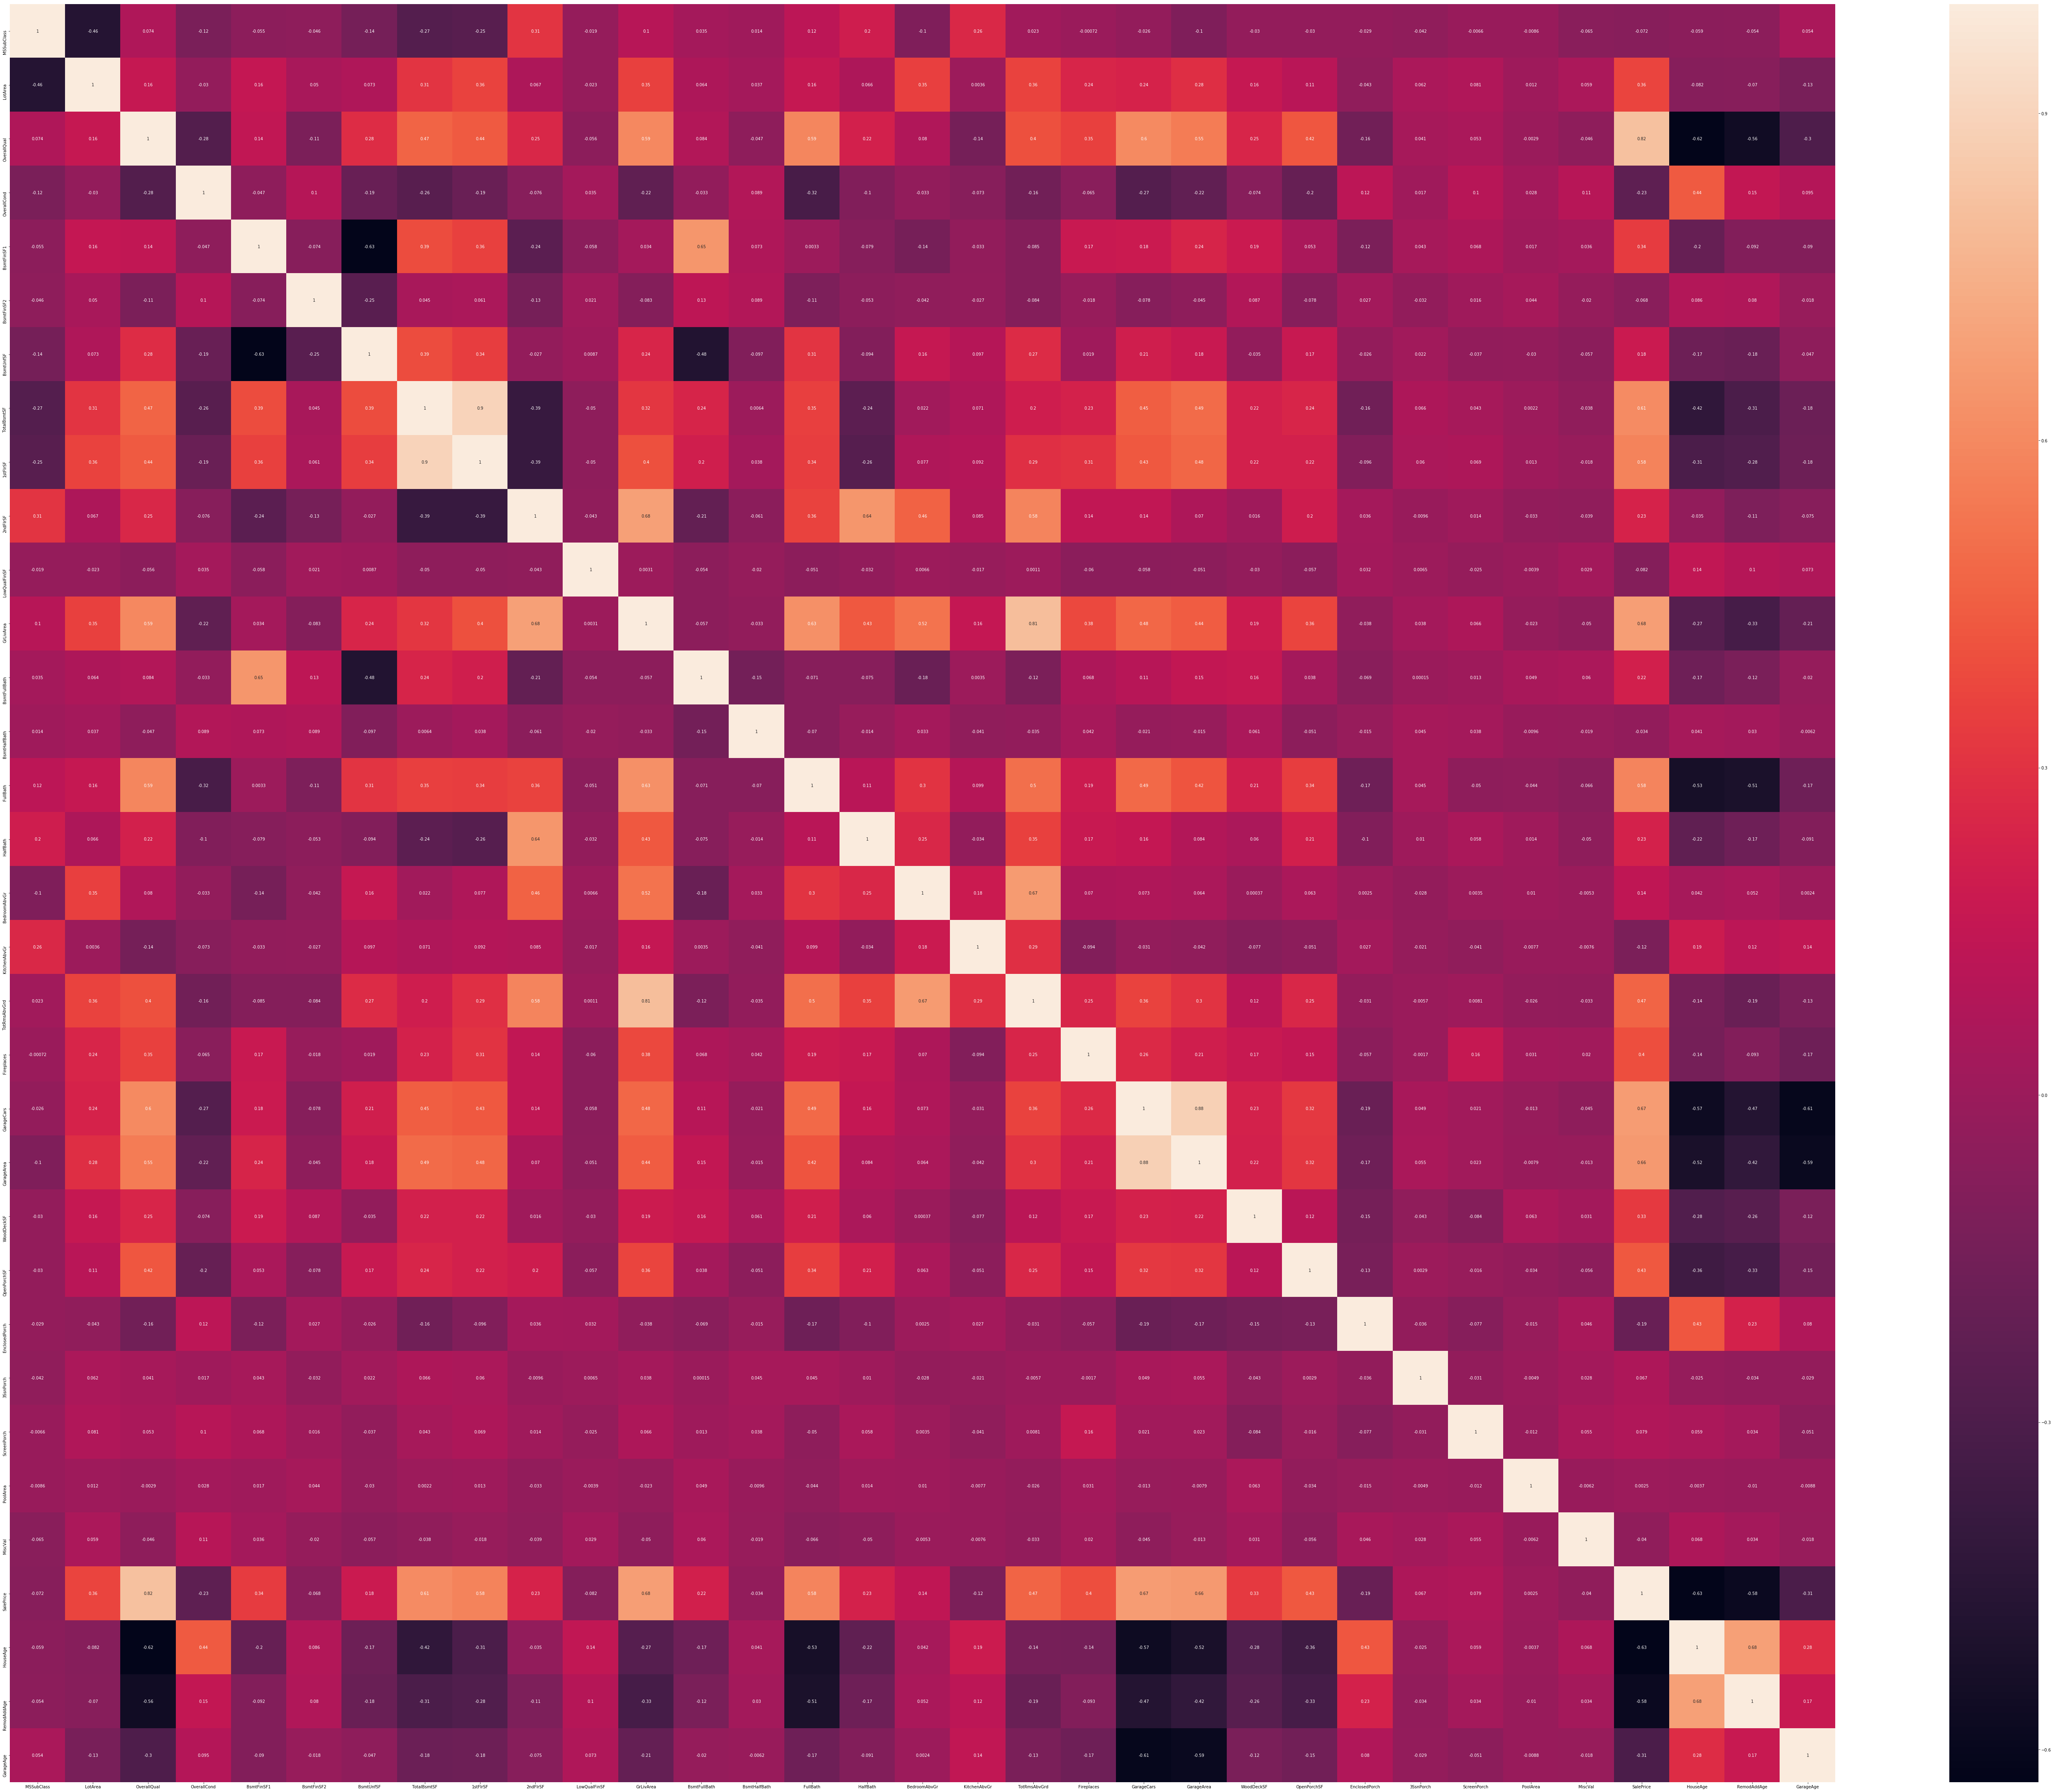

In [49]:
#Let's see the correlation matrix
plt.figure(figsize= (100,80))      #size of the figure
sns.heatmap(US_Hous.corr(),annot=True)

## Visualizing Bar plot for categorical variables

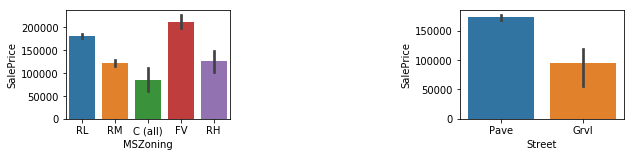

In [50]:
#barplot for categorical variables

plt.figure(figsize=(10, 2))
plt.subplot(1,3,1)
sns.barplot(x='MSZoning', y='SalePrice', data=US_Hous)
plt.subplot(1,3,3)
sns.barplot(x='Street', y='SalePrice', data=US_Hous)
plt.show()

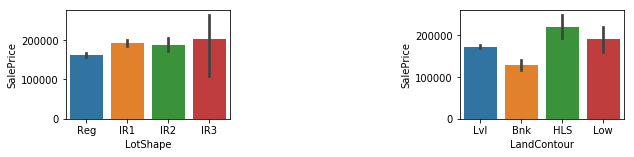

In [51]:
plt.figure(figsize=(10, 2))
plt.subplot(1,3,1)
sns.barplot(x='LotShape', y='SalePrice', data=US_Hous)
plt.subplot(1,3,3)
sns.barplot(x='LandContour', y='SalePrice', data=US_Hous)
plt.show()

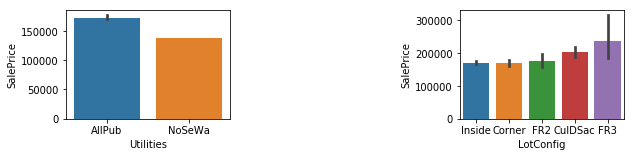

In [52]:
plt.figure(figsize=(10, 2))
plt.subplot(1,3,1)
sns.barplot(x='Utilities', y='SalePrice', data=US_Hous)
plt.subplot(1,3,3)
sns.barplot(x='LotConfig', y='SalePrice', data=US_Hous)
plt.show()

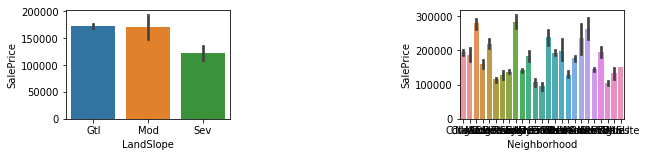

In [53]:
plt.figure(figsize=(10, 2))
plt.subplot(1,3,1)
sns.barplot(x='LandSlope', y='SalePrice', data=US_Hous)
plt.subplot(1,3,3)
sns.barplot(x='Neighborhood', y='SalePrice', data=US_Hous)
plt.show()

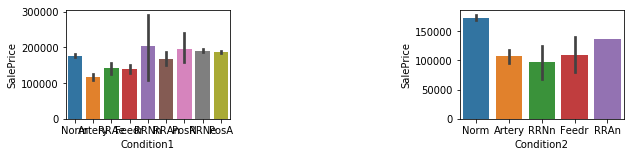

In [54]:
plt.figure(figsize=(10, 2))
plt.subplot(1,3,1)
sns.barplot(x='Condition1', y='SalePrice', data=US_Hous)
plt.subplot(1,3,3)
sns.barplot(x='Condition2', y='SalePrice', data=US_Hous)
plt.show()

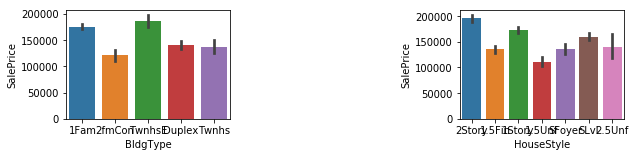

In [55]:
plt.figure(figsize=(10, 2))
plt.subplot(1,3,1)
sns.barplot(x='BldgType', y='SalePrice', data=US_Hous)
plt.subplot(1,3,3)
sns.barplot(x='HouseStyle', y='SalePrice', data=US_Hous)
plt.show()

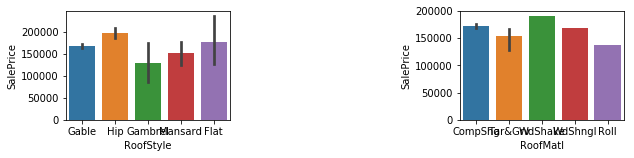

In [56]:
plt.figure(figsize=(10, 2))
plt.subplot(1,3,1)
sns.barplot(x='RoofStyle', y='SalePrice', data=US_Hous)
plt.subplot(1,3,3)
sns.barplot(x='RoofMatl', y='SalePrice', data=US_Hous)
plt.show()

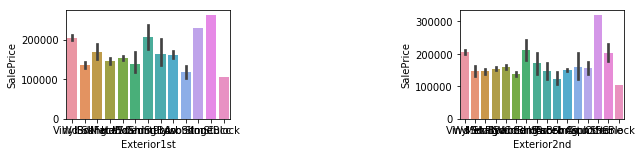

In [57]:
plt.figure(figsize=(10, 2))
plt.subplot(1,3,1)
sns.barplot(x='Exterior1st', y='SalePrice', data=US_Hous)
plt.subplot(1,3,3)
sns.barplot(x='Exterior2nd', y='SalePrice', data=US_Hous)
plt.show()

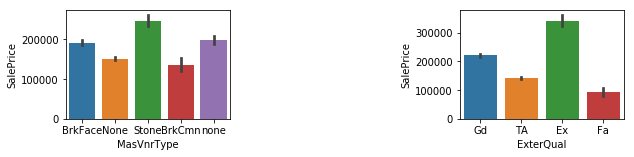

In [58]:
plt.figure(figsize=(10, 2))
plt.subplot(1,3,1)
sns.barplot(x='MasVnrType', y='SalePrice', data=US_Hous)
plt.subplot(1,3,3)
sns.barplot(x='ExterQual', y='SalePrice', data=US_Hous)
plt.show()

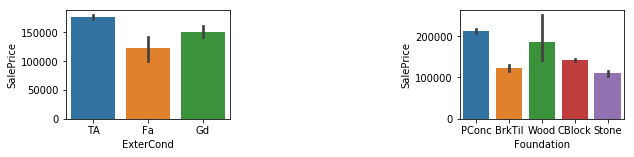

In [59]:
plt.figure(figsize=(10, 2))
plt.subplot(1,3,1)
sns.barplot(x='ExterCond', y='SalePrice', data=US_Hous)
plt.subplot(1,3,3)
sns.barplot(x='Foundation', y='SalePrice', data=US_Hous)
plt.show()

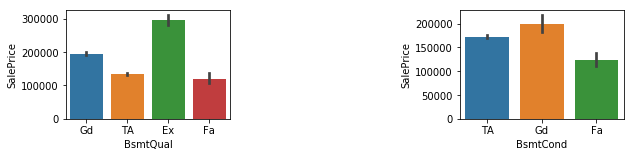

In [60]:
plt.figure(figsize=(10, 2))
plt.subplot(1,3,1)
sns.barplot(x='BsmtQual', y='SalePrice', data=US_Hous)
plt.subplot(1,3,3)
sns.barplot(x='BsmtCond', y='SalePrice', data=US_Hous)
plt.show()

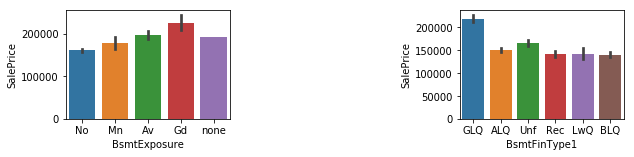

In [61]:
plt.figure(figsize=(10, 2))
plt.subplot(1,3,1)
sns.barplot(x='BsmtExposure', y='SalePrice', data=US_Hous)
plt.subplot(1,3,3)
sns.barplot(x='BsmtFinType1', y='SalePrice', data=US_Hous)
plt.show()

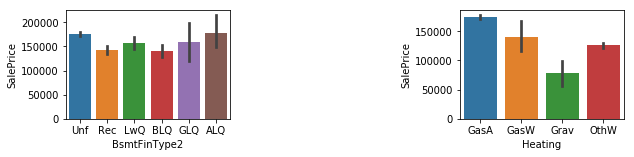

In [62]:
plt.figure(figsize=(10, 2))
plt.subplot(1,3,1)
sns.barplot(x='BsmtFinType2', y='SalePrice', data=US_Hous)
plt.subplot(1,3,3)
sns.barplot(x='Heating', y='SalePrice', data=US_Hous)
plt.show()

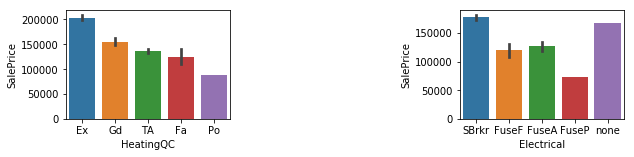

In [63]:
plt.figure(figsize=(10, 2))
plt.subplot(1,3,1)
sns.barplot(x='HeatingQC', y='SalePrice', data=US_Hous)
plt.subplot(1,3,3)
sns.barplot(x='Electrical', y='SalePrice', data=US_Hous)
plt.show()

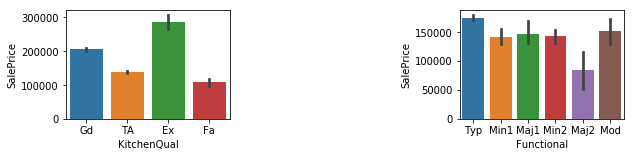

In [64]:
plt.figure(figsize=(10, 2))
plt.subplot(1,3,1)
sns.barplot(x='KitchenQual', y='SalePrice', data=US_Hous)
plt.subplot(1,3,3)
sns.barplot(x='Functional', y='SalePrice', data=US_Hous)
plt.show()

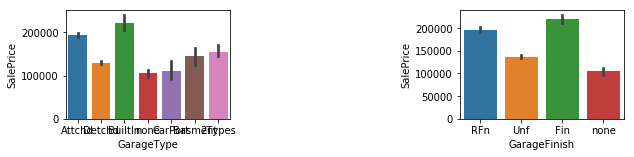

In [65]:
plt.figure(figsize=(10, 2))
plt.subplot(1,3,1)
sns.barplot(x='GarageType', y='SalePrice', data=US_Hous)
plt.subplot(1,3,3)
sns.barplot(x='GarageFinish', y='SalePrice', data=US_Hous)
plt.show()

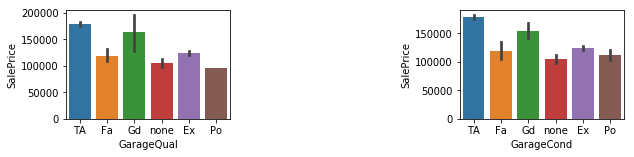

In [66]:
plt.figure(figsize=(10, 2))
plt.subplot(1,3,1)
sns.barplot(x='GarageQual', y='SalePrice', data=US_Hous)
plt.subplot(1,3,3)
sns.barplot(x='GarageCond', y='SalePrice', data=US_Hous)
plt.show()

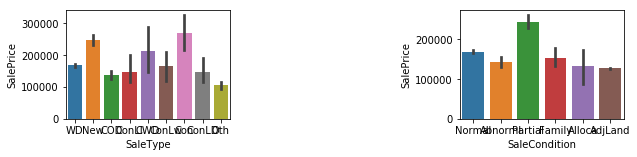

In [67]:
plt.figure(figsize=(10, 2))
plt.subplot(1,3,1)
sns.barplot(x='SaleType', y='SalePrice', data=US_Hous)
plt.subplot(1,3,3)
sns.barplot(x='SaleCondition', y='SalePrice', data=US_Hous)
plt.show()

From above bar plot we have observed the relation ship between Saleprice and various categorical variables

In [68]:
US_Hous.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,HouseAge,RemodAddAge,GarageAge
0,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,WD,Normal,208500,5,5,5
2,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,WD,Normal,223500,7,6,7
3,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,WD,Abnorml,140000,91,36,8
4,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,WD,Normal,250000,8,8,8
5,50,RL,85,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,320,0,0,700,WD,Normal,143000,16,14,16
6,20,RL,75,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,WD,Normal,307000,3,2,3
8,50,RM,51,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,WD,Abnorml,129900,77,58,77
9,190,RL,50,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,WD,Normal,118000,69,58,69
10,20,RL,70,11200,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,WD,Normal,129500,43,43,43
11,60,RL,85,11924,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,New,Partial,345000,1,0,1


### Let's check the skewness of the model

We’ll check for skewness, which is a measure of the shape of the distribution of values.

When performing regression, sometimes it makes sense to log-transform the target variable when it is skewed. One reason for this is to improve the linearity of the data

Skew is: 1.1090498387091412


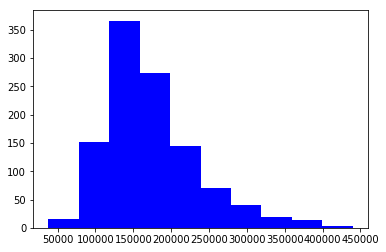

In [69]:
print ("Skew is:", US_Hous.SalePrice.skew())
plt.hist(US_Hous.SalePrice, color='blue')
plt.show()

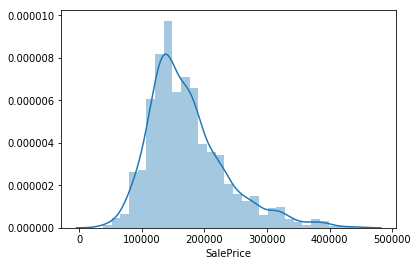

In [70]:
sns.distplot(US_Hous.SalePrice)
plt.show()

As we can see the graph of above target variable is skewed with 1.1090498387091412 and doesn't form a normal distribution curve.

So we need to tranform it to normal distribution curve by taking log. We are taking log to make our model linear.

Skew is: -0.03798910620615337


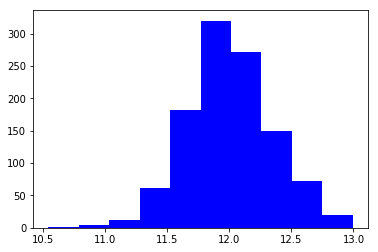

In [71]:
US_Hous['Transform Price'] = np.log(US_Hous.SalePrice)
print ("Skew is:", US_Hous['Transform Price'].skew())
plt.hist(US_Hous['Transform Price'], color='blue')
plt.show()

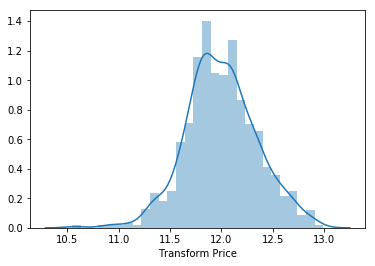

In [72]:
sns.distplot(US_Hous['Transform Price'])
plt.show()

A value closer to 0 means that we have improved the skewness of the data. We can see visually that the data will more resembles a normal distribution.

### Creation of Dummy Variable

In [73]:

# Creating a dummy variable for the variable 'MSZoning' and dropping the first one.
MSZoning = pd.get_dummies(US_Hous['MSZoning'],prefix='MSZoning',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,MSZoning],axis=1)

# Creating a dummy variable for the variable 'Street' and dropping the first one.
Street = pd.get_dummies(US_Hous['Street'],prefix='Street',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,Street],axis=1)

# Creating a dummy variable for the variable 'LotShape' and dropping the first one.
LotShape= pd.get_dummies(US_Hous['LotShape'],prefix='LotShape',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,LotShape],axis=1)

# Creating a dummy variable for the variable 'LandContour' and dropping the first one.
LandContour = pd.get_dummies(US_Hous['LandContour'],prefix='LandContour',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,LandContour],axis=1)




# Creating a dummy variable for the variable 'Utilities' and dropping the first one.
Utilities = pd.get_dummies(US_Hous['Utilities'],prefix='Utilities',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,Utilities],axis=1)

# Creating a dummy variable for the variable 'LotConfig' and dropping the first one.
LotConfig = pd.get_dummies(US_Hous['LotConfig'],prefix='LotConfig',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,LotConfig],axis=1)

# Creating a dummy variable for the variable 'LandSlope' and dropping the first one.
LandSlope = pd.get_dummies(US_Hous['LandSlope'],prefix='LandSlope',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,LandSlope],axis=1)

# Creating a dummy variable for the variable 'Neighborhood' and dropping the first one.
Neighborhood = pd.get_dummies(US_Hous['Neighborhood'],prefix='Neighborhood',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,Neighborhood],axis=1)




# Creating a dummy variable for the variable 'Condition1' and dropping the first one.
Condition1 = pd.get_dummies(US_Hous['Condition1'],prefix='Condition1',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,Condition1],axis=1)

# Creating a dummy variable for the variable 'Condition2' and dropping the first one.
Condition2 = pd.get_dummies(US_Hous['Condition2'],prefix='Condition2',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,Condition2],axis=1)

# Creating a dummy variable for the variable 'BldgType' and dropping the first one.
BldgType = pd.get_dummies(US_Hous['BldgType'],prefix='BldgType',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,BldgType],axis=1)

# Creating a dummy variable for the variable 'HouseStyle' and dropping the first one.
HouseStyle = pd.get_dummies(US_Hous['HouseStyle'],prefix='HouseStyle',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,HouseStyle],axis=1)




# Creating a dummy variable for the variable 'RoofStyle' and dropping the first one.
RoofStyle = pd.get_dummies(US_Hous['RoofStyle'],prefix='RoofStyle',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,RoofStyle],axis=1)

# Creating a dummy variable for the variable 'RoofMatl' and dropping the first one.
RoofMatl = pd.get_dummies(US_Hous['RoofMatl'],prefix='RoofMatl',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,RoofMatl],axis=1)

# Creating a dummy variable for the variable 'Exterior1st' and dropping the first one.
Exterior1st = pd.get_dummies(US_Hous['Exterior1st'],prefix='Exterior1st',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,Exterior1st],axis=1)

# Creating a dummy variable for the variable 'Exterior2nd' and dropping the first one.
Exterior2nd = pd.get_dummies(US_Hous['Exterior2nd'],prefix='Exterior2nd',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,Exterior2nd],axis=1)


# Creating a dummy variable for the variable 'MasVnrType' and dropping the first one.
MasVnrType = pd.get_dummies(US_Hous['MasVnrType'],prefix='MasVnrType',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,MasVnrType],axis=1)

# Creating a dummy variable for the variable 'ExterQual' and dropping the first one.
ExterQual = pd.get_dummies(US_Hous['ExterQual'],prefix='ExterQual',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,ExterQual],axis=1)

# Creating a dummy variable for the variable 'ExterCond' and dropping the first one.
ExterCond = pd.get_dummies(US_Hous['ExterCond'],prefix='ExterCond',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,ExterCond],axis=1)

# Creating a dummy variable for the variable 'Foundation' and dropping the first one.
Foundation = pd.get_dummies(US_Hous['Foundation'],prefix='Foundation',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,Foundation],axis=1)




# Creating a dummy variable for the variable 'BsmtQual' and dropping the first one.
BsmtQual= pd.get_dummies(US_Hous['BsmtQual'],prefix='BsmtQual',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,BsmtQual],axis=1)

# Creating a dummy variable for the variable 'BsmtCond' and dropping the first one.
BsmtCond = pd.get_dummies(US_Hous['BsmtCond'],prefix='BsmtCond',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,BsmtCond],axis=1)

# Creating a dummy variable for the variable 'BsmtExposure' and dropping the first one.
BsmtExposure = pd.get_dummies(US_Hous['BsmtExposure'],prefix='BsmtExposure',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,BsmtExposure],axis=1)

# Creating a dummy variable for the variable 'BsmtFinType1' and dropping the first one.
BsmtFinType1 = pd.get_dummies(US_Hous['BsmtFinType1'],prefix='BsmtFinType1',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,BsmtFinType1],axis=1)




# Creating a dummy variable for the variable 'BsmtFinType2' and dropping the first one.
BsmtFinType2 = pd.get_dummies(US_Hous['BsmtFinType2'],prefix='BsmtFinType2',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,BsmtFinType2],axis=1)

# Creating a dummy variable for the variable 'Heating' and dropping the first one.
Heating = pd.get_dummies(US_Hous['Heating'],prefix='Heating',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,Heating],axis=1)

# Creating a dummy variable for the variable 'HeatingQC' and dropping the first one.
HeatingQC = pd.get_dummies(US_Hous['HeatingQC'],prefix='HeatingQC',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,HeatingQC],axis=1)

# Creating a dummy variable for the variable 'Electrical' and dropping the first one.
Electrical = pd.get_dummies(US_Hous['Electrical'],prefix='Electrical',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,Electrical],axis=1)



# Creating a dummy variable for the variable 'KitchenQual' and dropping the first one.
KitchenQual = pd.get_dummies(US_Hous['KitchenQual'],prefix='KitchenQual',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,KitchenQual],axis=1)

# Creating a dummy variable for the variable 'Functional' and dropping the first one.
Functional = pd.get_dummies(US_Hous['Functional'],prefix='Functional',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,Functional],axis=1)

# Creating a dummy variable for the variable 'GarageType' and dropping the first one.
GarageType = pd.get_dummies(US_Hous['GarageType'],prefix='GarageType',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,GarageType],axis=1)

# Creating a dummy variable for the variable 'GarageFinish' and dropping the first one.
GarageFinish = pd.get_dummies(US_Hous['GarageFinish'],prefix='GarageFinish',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,GarageFinish],axis=1)



# Creating a dummy variable for the variable 'GarageQual' and dropping the first one.
GarageQual = pd.get_dummies(US_Hous['GarageQual'],prefix='GarageQual',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,GarageQual],axis=1)

# Creating a dummy variable for the variable 'GarageCond' and dropping the first one.
GarageCond = pd.get_dummies(US_Hous['GarageCond'],prefix='GarageCond',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,GarageCond],axis=1)

# Creating a dummy variable for the variable 'SaleType' and dropping the first one.
SaleType = pd.get_dummies(US_Hous['SaleType'],prefix='SaleType',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,SaleType],axis=1)

# Creating a dummy variable for the variable 'SaleCondition' and dropping the first one.
SaleCondition = pd.get_dummies(US_Hous['SaleCondition'],prefix='SaleCondition',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,SaleCondition],axis=1)


# Creating a dummy variable for the variable 'CentralAir' and dropping the first one.
CentralAir = pd.get_dummies(US_Hous['CentralAir'],prefix='CentralAir',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,CentralAir],axis=1)

# Creating a dummy variable for the variable 'PavedDrive' and dropping the first one.
PavedDrive = pd.get_dummies(US_Hous['PavedDrive'],prefix='PavedDrive',drop_first=True)
#Adding the results to the master dataframe
US_Hous = pd.concat([US_Hous,PavedDrive],axis=1)


US_Hous.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,CentralAir_Y,PavedDrive_P,PavedDrive_Y
0,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,1,0,0,0,1,0,1,0,1
2,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,1,0,0,0,1,0,1,0,1
3,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,1,0,0,0,0,0,1,0,1
4,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,1,0,0,0,1,0,1,0,1
5,50,RL,85,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,1,0,0,0,1,0,1,0,1


In [74]:
# We have created dummies for the below variables, so we can drop them
US_Hous=US_Hous.drop(['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
        'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
        'ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
        'HeatingQC','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond',
        'SaleType','SaleCondition','CentralAir','PavedDrive'],axis=1)
US_Hous.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,CentralAir_Y,PavedDrive_P,PavedDrive_Y
0,60,65,8450,7,5,196,706,0,150,856,...,0,1,0,0,0,1,0,1,0,1
2,60,68,11250,7,5,162,486,0,434,920,...,0,1,0,0,0,1,0,1,0,1
3,70,60,9550,7,5,0,216,0,540,756,...,0,1,0,0,0,0,0,1,0,1
4,60,84,14260,8,5,350,655,0,490,1145,...,0,1,0,0,0,1,0,1,0,1
5,50,85,14115,5,5,0,732,0,64,796,...,0,1,0,0,0,1,0,1,0,1


## Model Building
Let's start by splitting our data into a training set and a test set.

### Splitting Data into Training and Test Sets

In [75]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X=US_Hous.drop(['SalePrice','Transform Price'], axis=1)

# Putting response variable to y
Y = US_Hous['Transform Price']

Y.head()

0    12.247694
2    12.317167
3    11.849398
4    12.429216
5    11.870600
Name: Transform Price, dtype: float64

In [76]:
# Splitting the data into train and test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, train_size=0.7, test_size=0.3, random_state=100)

### Running First Training Model

##### Next step is to scale the variables. 

It is important that we bring all variables at same scale

In [77]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()


# Apply scaler() to all the numeric columns 
num_vars = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
            'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea',
            'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal','HouseAge',
            'RemodAddAge','GarageAge']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

### Step 2- Model Building

In [78]:
# Import 'Ridge' and create a Ridge object
from sklearn.linear_model import Ridge
ridge = Ridge()

#Importing RFE
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

# Running RFE with the output number of the variable equal to 25

X_train_ridge = X_train.copy()
Y_train_ridge = Y_train.copy()
X_test_ridge = X_test.copy()
Y_test_ridge = Y_test.copy()


rfe = RFE(ridge, 25)             # running RFE
rfe = rfe.fit(X_train_ridge, Y_train_ridge)

col = X_train_ridge.columns[rfe.support_]
X_train_ridge = X_train_ridge[col]
X_test_ridge = X_test_ridge[col]


#list of alphas to tune
params = {'alpha': [0.00001,0.0001,0.01,0.1,0.5,1,10]}

ridge.fit(X_train_ridge, Y_train_ridge)


#cross validation

folds =5 
model_cv = GridSearchCV(estimator = ridge,
                       param_grid = params,
                       scoring ='neg_mean_absolute_error',
                       cv= folds,
                       return_train_score = True,
                       verbose =1)
model_cv.fit(X_train_ridge, Y_train_ridge)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-05, 0.0001, 0.01, 0.1, 0.5, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [79]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.0030,1.168008e-07,0.0004,0.00049,1e-05,{'alpha': 1e-05},-0.112288,-0.100859,-0.101942,-0.096018,...,-0.103835,0.005704,6,-0.094220,-0.097081,-0.097129,-0.099496,-0.095346,-0.096655,0.001796
1,0.0028,7.483792e-04,0.0008,0.00040,0.0001,{'alpha': 0.0001},-0.112287,-0.100859,-0.101942,-0.096018,...,-0.103834,0.005704,5,-0.094220,-0.097081,-0.097129,-0.099496,-0.095346,-0.096655,0.001795
2,0.0030,1.784161e-07,0.0006,0.00049,0.01,{'alpha': 0.01},-0.112255,-0.100795,-0.101939,-0.096025,...,-0.103815,0.005699,4,-0.094232,-0.097084,-0.097129,-0.099493,-0.095347,-0.096657,0.001791
3,0.0028,3.999949e-04,0.0006,0.00049,0.1,{'alpha': 0.1},-0.111986,-0.100242,-0.101924,-0.096084,...,-0.103647,0.005658,3,-0.094330,-0.097111,-0.097139,-0.099467,-0.095362,-0.096682,0.001757
4,0.0026,4.899014e-04,0.0004,0.00049,0.5,{'alpha': 0.5},-0.111149,-0.098444,-0.101959,-0.096367,...,-0.103148,0.005574,2,-0.094769,-0.097273,-0.097245,-0.099376,-0.095490,-0.096830,0.001606


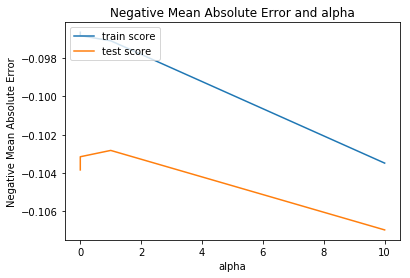

In [80]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [81]:
alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_ridge, Y_train_ridge)
ridge.coef_


y_train_predict_ridge  = ridge.predict(X_train_ridge)
from sklearn.metrics import r2_score
r2_score(Y_train_ridge, y_train_predict_ridge)

0.8663538703643948

## Lasso

In [82]:
# Running RFE with the output number of the variable equal to 25

from sklearn.linear_model import Lasso
X_train_lasso = X_train.copy()
Y_train_lasso = Y_train.copy()
X_test_lasso = X_test.copy()
Y_test_lasso = Y_test.copy()

lasso = Lasso()

rfe = RFE(lasso,25)            # running RFE
rfe = rfe.fit(X_train_lasso,Y_train_lasso)

col = X_train_lasso.columns[rfe.support_]
X_train_lasso = X_train_lasso[col]
X_test_lasso = X_test_lasso[col]

# list of alphas to tune
params ={'alpha': [0.0001,0.001, 0.002,0.003,0.004]}

#cross validation
model_cv = GridSearchCV(estimator= lasso,
                       param_grid= params,
                       scoring ='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score = True,
                       verbose = 1)

model_cv.fit(X_train_lasso, Y_train_lasso)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.002, 0.003, 0.004]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [83]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.017401,0.001020,0.0014,4.899403e-04,0.0001,{'alpha': 0.0001},-0.106780,-0.104094,-0.094418,-0.105630,...,-0.101706,0.004839,3,-0.095184,-0.096204,-0.098809,-0.096429,-0.097497,-0.096825,0.001235
1,0.009600,0.001625,0.0010,1.507891e-07,0.001,{'alpha': 0.001},-0.104930,-0.103106,-0.094005,-0.105117,...,-0.100847,0.004499,1,-0.095447,-0.096610,-0.098974,-0.096129,-0.097851,-0.097002,0.001261
2,0.008000,0.001095,0.0010,1.168008e-07,0.002,{'alpha': 0.002},-0.104461,-0.105181,-0.093748,-0.105082,...,-0.101153,0.004745,2,-0.096075,-0.097439,-0.099430,-0.096632,-0.098757,-0.097667,0.001261
3,0.008201,0.001939,0.0010,6.325605e-04,0.003,{'alpha': 0.003},-0.104845,-0.108406,-0.093959,-0.105562,...,-0.102200,0.005308,4,-0.097247,-0.098727,-0.100511,-0.097901,-0.100141,-0.098905,0.001257
4,0.006600,0.000800,0.0010,9.536743e-08,0.004,{'alpha': 0.004},-0.106154,-0.111628,-0.094853,-0.106184,...,-0.103752,0.005796,5,-0.098916,-0.100439,-0.101956,-0.099597,-0.102016,-0.100585,0.001242


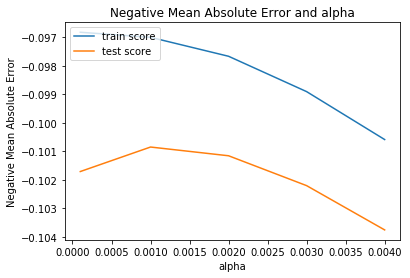

In [84]:
#plotting mean test and train score with alpha

cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [85]:
alpha = 0.001

lasso = Lasso(alpha=alpha)

lasso.fit(X_train_lasso, Y_train_lasso)


y_train_predict_lasso  = lasso.predict(X_train_lasso)
from sklearn.metrics import r2_score
r2_score(Y_train_lasso, y_train_predict_lasso)

0.8566129935583684

In [86]:
lasso.coef_

array([-0.00024672, -0.00065239,  0.03557527,  0.12894598,  0.02804302,
       -0.        ,  0.05207679,  0.00345303, -0.        ,  0.05765394,
        0.07657572,  0.11195427,  0.        ,  0.        ,  0.0534402 ,
        0.        , -0.        ,  0.        ,  0.        , -0.00671504,
        0.08976871,  0.13416813,  0.16569175,  0.        ,  0.11612387])

### RIDGE Prediction

In [87]:
#  Let's make prediction using final model

y_test_predict_ridge  = ridge.predict(X_test_ridge)
from sklearn.metrics import r2_score
r2_score(Y_test_ridge, y_test_predict_ridge)

0.8236672197749254

### LASSO  Prediction

In [88]:
#  Let's make prediction using final model

y_test_predict_lasso  = lasso.predict(X_test_lasso)
from sklearn.metrics import r2_score
r2_score(Y_test_lasso, y_test_predict_lasso)

0.8479329272273419

In [89]:
# Since the test accuracy (0.8479) for lasso ahs come better than Ridge (0.8236)
# let's choose Lasso as final model.  


# Let's create a new data frame with lasso coeff values, corresponding column names and absolute coefficient values
lasso_df = pd.DataFrame() 
lasso_df['Coeff'] = pd.Series(lasso.coef_) 
lasso_df['Vars'] = X_train_lasso.columns

# Removing rows that have coeff = 0
lasso_df = lasso_df.loc[lasso_df['Coeff']!=0]

lasso_df['Absolute Coeff Value'] =lasso_df['Coeff'].apply(lambda x:abs(x))
lasso_df.sort_values(by=['Absolute Coeff Value'],inplace=True,ascending=False)

print(lasso_df.head(20))

       Coeff                   Vars  Absolute Coeff Value
22  0.165692           CentralAir_Y              0.165692
21  0.134168  SaleCondition_Partial              0.134168
3   0.128946            OverallQual              0.128946
24  0.116124           PavedDrive_Y              0.116124
11  0.111954               2ndFlrSF              0.111954
20  0.089769   SaleCondition_Normal              0.089769
10  0.076576               1stFlrSF              0.076576
9   0.057654            TotalBsmtSF              0.057654
14  0.053440           SaleType_New              0.053440
6   0.052077             BsmtFinSF1              0.052077
2   0.035575                LotArea              0.035575
4   0.028043            OverallCond              0.028043
19 -0.006715   SaleCondition_Family              0.006715
7   0.003453             BsmtFinSF2              0.003453
1  -0.000652            LotFrontage              0.000652
0  -0.000247             MSSubClass              0.000247



---are the  variables which are significant in predicting the price of a house

---and the Absolute Coeff Value of above variables shows how much they affect the price of the house


# Task Completed
### To find

-Which variables are significant in predicting the price of a house?


*Findings:--*

**CentralAir_Y             
SaleCondition_Partial    
OverallQual               
PavedDrive_Y              
2ndFlrSF**                 

*--are the varaibles that affect the most.*

*--are the top 5 variables which are significant in predicting the price of a house.*

# Task Completed
### To find

-How well those variables describe the price of a house.?


*Findings:--*

**Vars      ______________    Absolute Coeff Value**

CentralAir_Y  ______________ 0.165692

SaleCondition_Partial    ______________ 0.134168

OverallQual          ______________     0.128946

PavedDrive_Y        ______________      0.116124

2ndFlrSF            ______________      0.111954

**--the Absolute Coeff Value of above variables shows how much they affect the price of the house**

# Task Completed
## To determine

--The optimal value of lambda for ridge and lasso regression.



**--The optimal value of lambda for ridge regression  is   alpha = 1**

**--The optimal value of lambda for lasso regression  is   alpha = 0.001**
